# Dictionnaire des variables






 puiss_admin_98: la puissance administrative  
 
 puiss_max: la puissance maximale (en kW) 
 
 conso_urb: consommation urbaine de carburant  (en l/100km)
 
 conso_mixte: consommation extra urbaine de carburant  (en l/100km)
 
 co2: l'émission de CO2 (en g/km)   gramme par km
 
 masse_ordma_min: la masse en ordre de marche mini en kg
 
 masse_ordma_max: la masse en ordre de marche maxi en kg
 
 lib_mrq: La marque
 
 cod_cbr: type de carburant
 
 gamme: gamme
 
 
 

# Importation des données brutes et des bibliothèques

In [96]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import validation_curve
import warnings

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import xgboost as xgb



data = pd.read_csv('data.csv', sep=';', decimal=',', encoding='ISO-8859-1')

data.head()


,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max,lib_mrq,gamme,cod_cbr
0,182.0,12,147.0,11.3,7.8,1505,1505,ALFA-ROMEO,MOY-SUPER,ES
1,186.0,12,147.0,11.5,8.0,1555,1555,ALFA-ROMEO,MOY-SUPER,ES
2,134.0,7,100.0,6.6,5.1,1565,1565,ALFA-ROMEO,MOY-SUPER,GO
3,134.0,7,100.0,6.6,5.1,1565,1565,ALFA-ROMEO,MOY-SUPER,GO
4,139.0,9,125.0,6.9,5.3,1565,1565,ALFA-ROMEO,MOY-SUPER,GO


<span style="color:green"> Extraction de la base de données des variables continues ou quantitatives. Ce sont ces variables qui seront utilisé pour la construction de notre modèle </span>



In [97]:
df = data.select_dtypes(include=['int', 'float'])
df=df.astype(float)
df.head()

,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max
0,182.0,12.0,147.0,11.3,7.8,1505.0,1505.0
1,186.0,12.0,147.0,11.5,8.0,1555.0,1555.0
2,134.0,7.0,100.0,6.6,5.1,1565.0,1565.0
3,134.0,7.0,100.0,6.6,5.1,1565.0,1565.0
4,139.0,9.0,125.0,6.9,5.3,1565.0,1565.0


# Analyse exploratoire des données

In [98]:
# Vérifions les colonnes qui comportes des données manquantes dans notre dataset
df.isnull().any()


co2                 True
puiss_admin_98     False
puiss_max          False
conso_urb           True
conso_mixte         True
masse_ordma_min    False
masse_ordma_max    False
dtype: bool

<span style="color:green"> Pourcentage de valeurs manquantes pour chaque variables de notre dataFrame  </span>



In [99]:

missing_values = df.isnull().sum()
percentage_missing = (missing_values / len(df)) * 100
print(percentage_missing)


co2                0.061769
puiss_admin_98     0.000000
puiss_max          0.000000
conso_urb          0.078119
conso_mixte        0.061769
masse_ordma_min    0.000000
masse_ordma_max    0.000000
dtype: float64


<span style="color:green"> Statistiques descriptive des variables </span>



In [100]:

df.describe()

,co2,puiss_admin_98,puiss_max,conso_urb,conso_mixte,masse_ordma_min,masse_ordma_max
count,55010.000000,55044.000000,55044.000000,55001.000000,55010.000000,55044.000000,55044.000000
mean,201.707035,10.551504,118.984916,9.575919,7.764832,2102.104553,2341.021801
std,33.976278,5.126021,45.417430,2.082148,1.381668,294.731715,424.067895
min,13.000000,1.000000,10.000000,0.000000,0.600000,825.000000,825.000000
25%,193.000000,9.000000,100.000000,8.800000,7.300000,1982.000000,2075.000000
50%,205.000000,10.000000,120.000000,9.400000,7.800000,2076.000000,2355.000000
75%,216.000000,10.000000,120.000000,10.200000,8.300000,2246.000000,2709.000000
max,572.000000,81.000000,585.000000,41.099998,24.500000,2760.000000,3094.000000


<span style="color:green"> Représentation des boxplots des distributions des variables sans les outliers   </span>



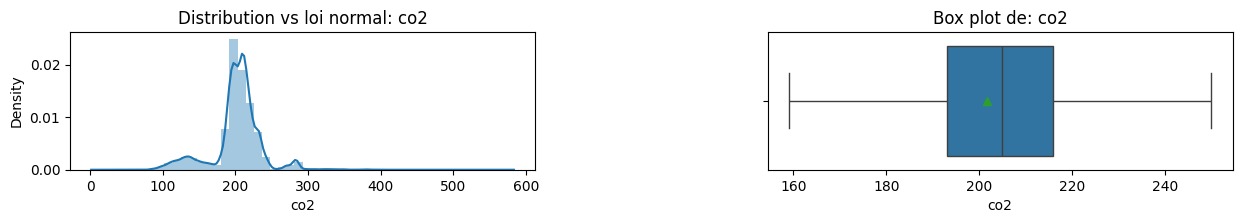

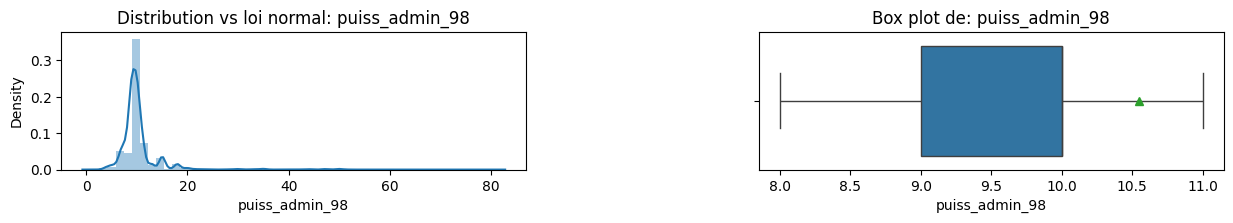

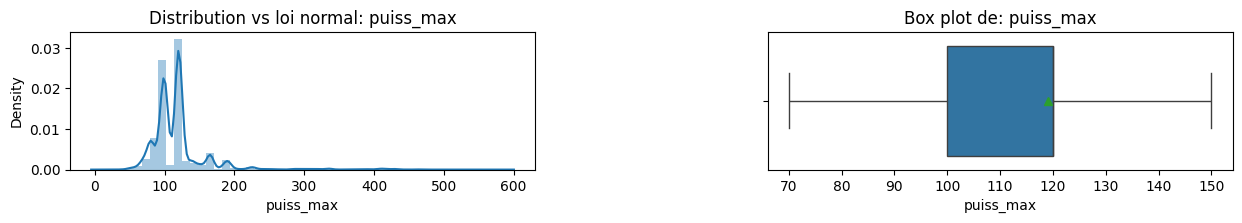

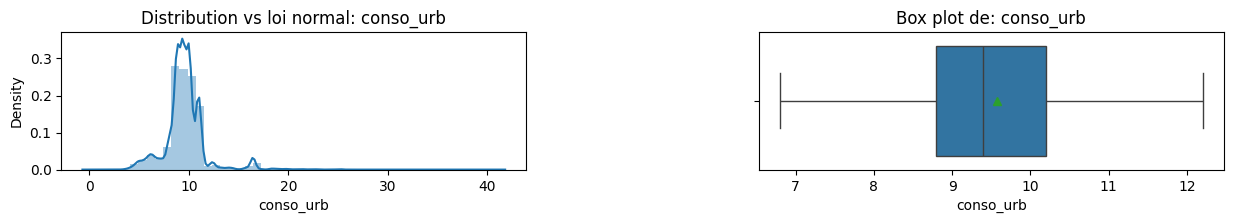

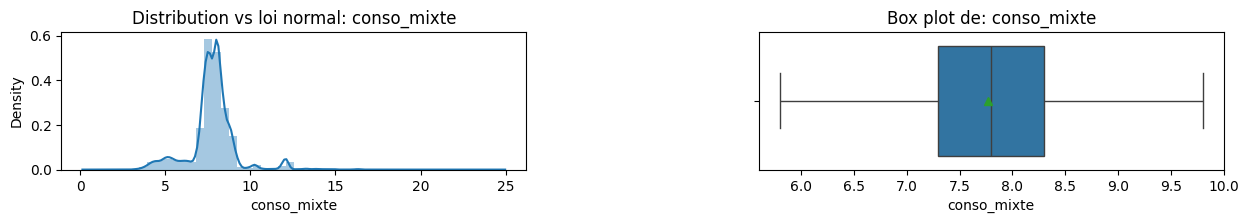

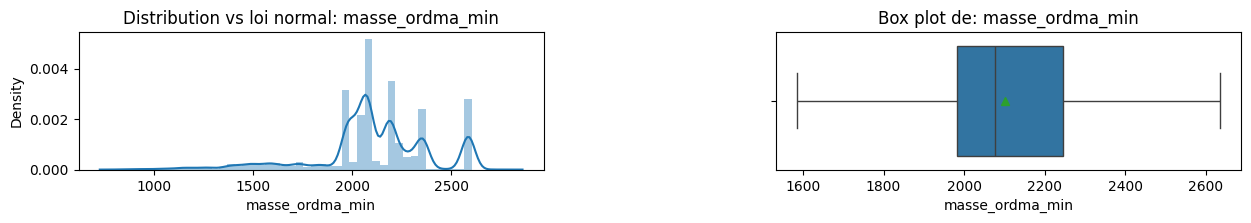

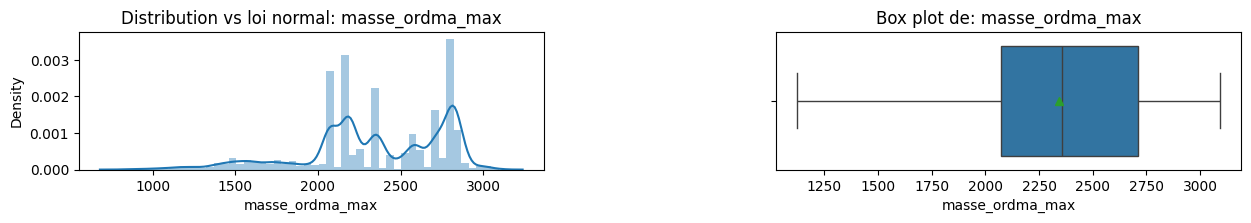

In [101]:

plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in df.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(df[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = df,  x = df[col], showfliers =False, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
warnings.filterwarnings("ignore")


COMMENTAIRE: Nous constatons que les distributions des différentes variables de nos données ne suivent pas une loi normale. Aussi, plus de la moitiè des véhicules émettent plus de 200 g/km de CO2.

<span style="color:green"> Représentation des boxplots des distributions des variables avec les outliers  </span>



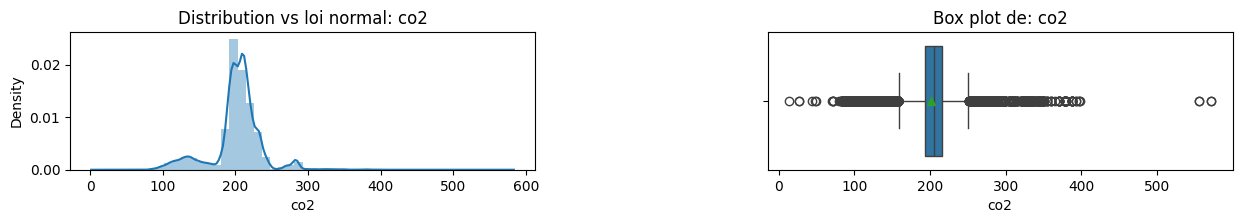

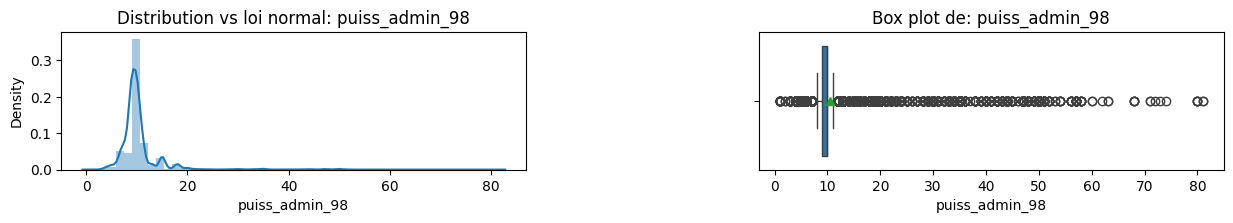

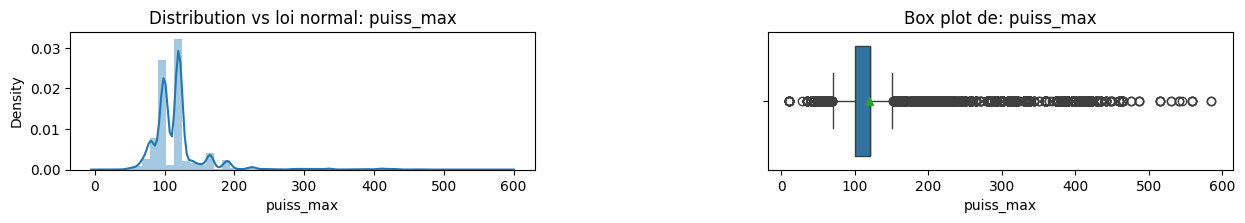

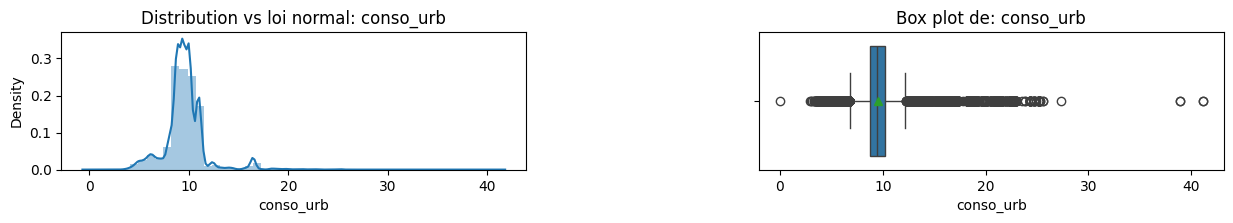

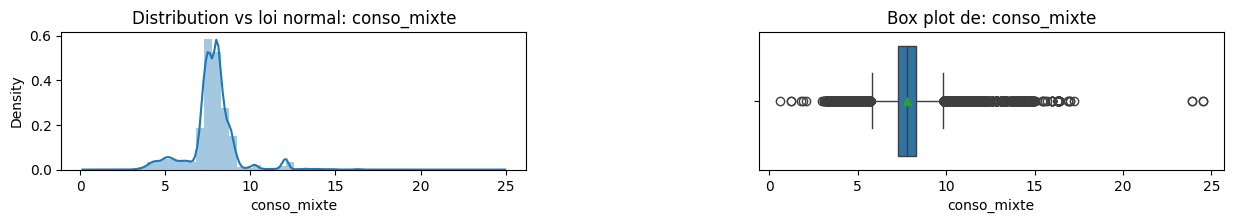

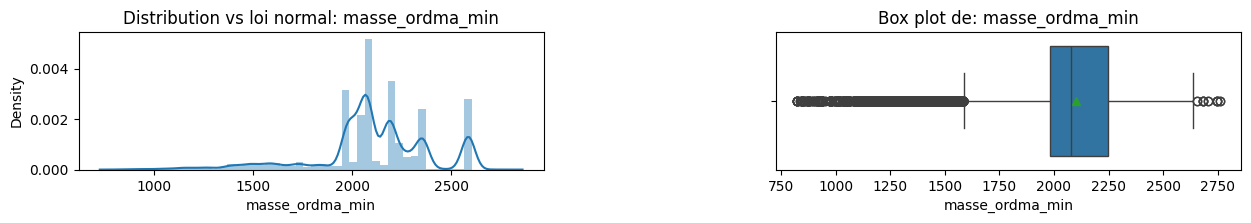

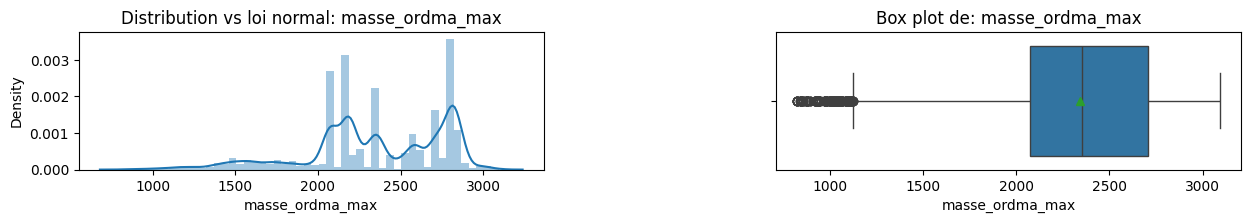

In [102]:
plt.rcParams["figure.figsize"] = [15,5]
grid = plt.GridSpec(2,2 , wspace=0.5, hspace=0.8)
for col in df.select_dtypes( include = ['float', 'int']).columns.to_list():
    plt.figure()
    ax0 = plt.subplot(grid[0, 0:1])
    ax0= sns.distplot(df[col], kde =True)
    ax0.set_title("Distribution vs loi normal: {}" .format(col), fontsize = 12)
    ax1 = plt.subplot(grid[0, 1:])
    ax1= sns.boxplot(data = df,  x = df[col], showfliers =True, showmeans =True)
    ax1.set_title("Box plot de: {}" .format(col), fontsize = 12)
warnings.filterwarnings("ignore")

Nous constatons la présence de valeurs abbérantes dans toute les variables de nos données. La présence de ces valeurs abbérantes est tout à fait logique compte tenue des différences individuelles de nos données (différences entre véhicules) qui peuvent être élevées. En effet, les caractéristiques techniques, la consommation en carburant et la pollution d'un véhicule de haute gamme peut être assez éloigné de la moyennes des mêmes caractéristique sur les véhicules de gammes moyens ou de basses gammes.    

Etant donnée la présence de ces valeurs abbérantes dans les colonnes comportants des valeurs manquantes,
nous avons choisi de remplacer les valeurs manquantes par la médiane compte tenue du fait que celui-ci est
moins sensible aux valeurs extrèmes.

<span style="color:green"> Moyenne d'émission de Co2 par marque  </span>



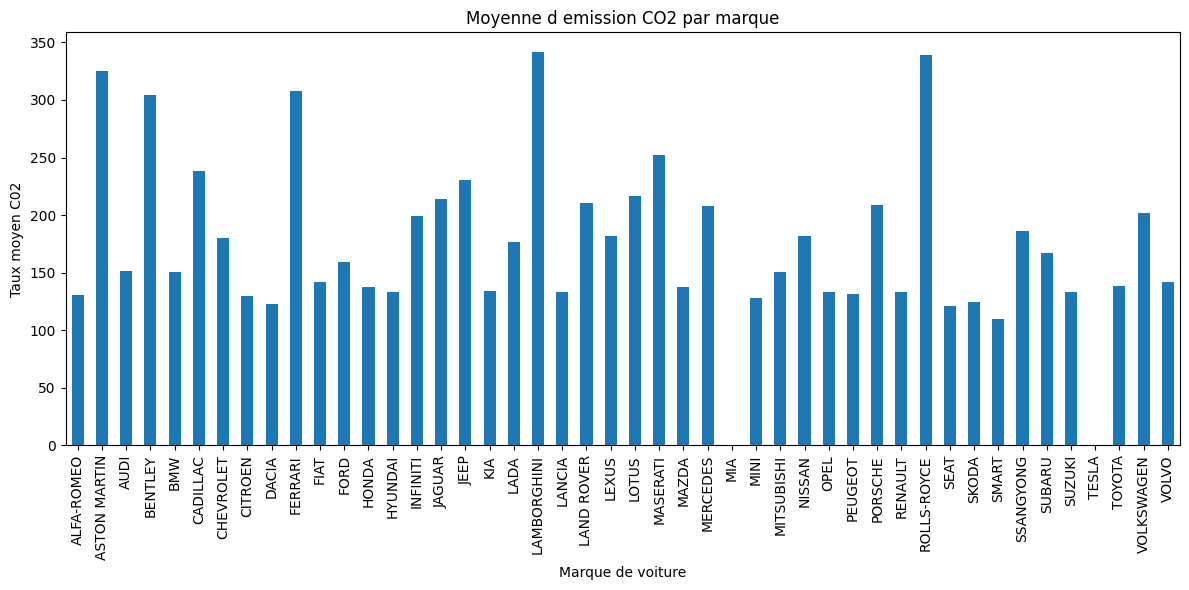

In [103]:
mean_by_modalite = data.groupby('lib_mrq')['co2'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
mean_by_modalite.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Moyenne d emission CO2 par marque')
plt.xlabel('Marque de voiture')
plt.ylabel('Taux moyen C02')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()


<span style="color:green"> Emission de Co2 en fonction de la gamme  </span>



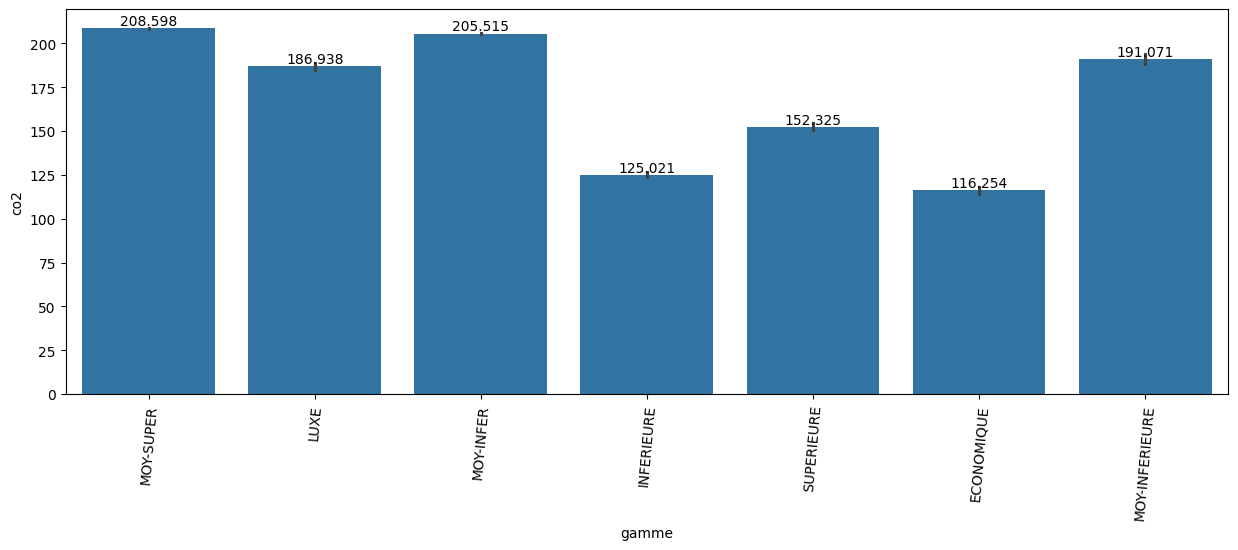

In [104]:
ax = sns.barplot(y = data['co2'], x = data['gamme'], data = data)
plt.xticks(rotation = 85)
for i in ax.containers:
    ax.bar_label(i,)
    
plt.show()

COMMENTAIRE: On constate que les vehicules de gamme: Luxe, MOY-SUPER et MOY-INFER polluent plus que les gammes Inferieures ou encore economiques.

<span style="color:green"> Nuages de points entre notre target(CO2) et nos features(autres variables)  </span>



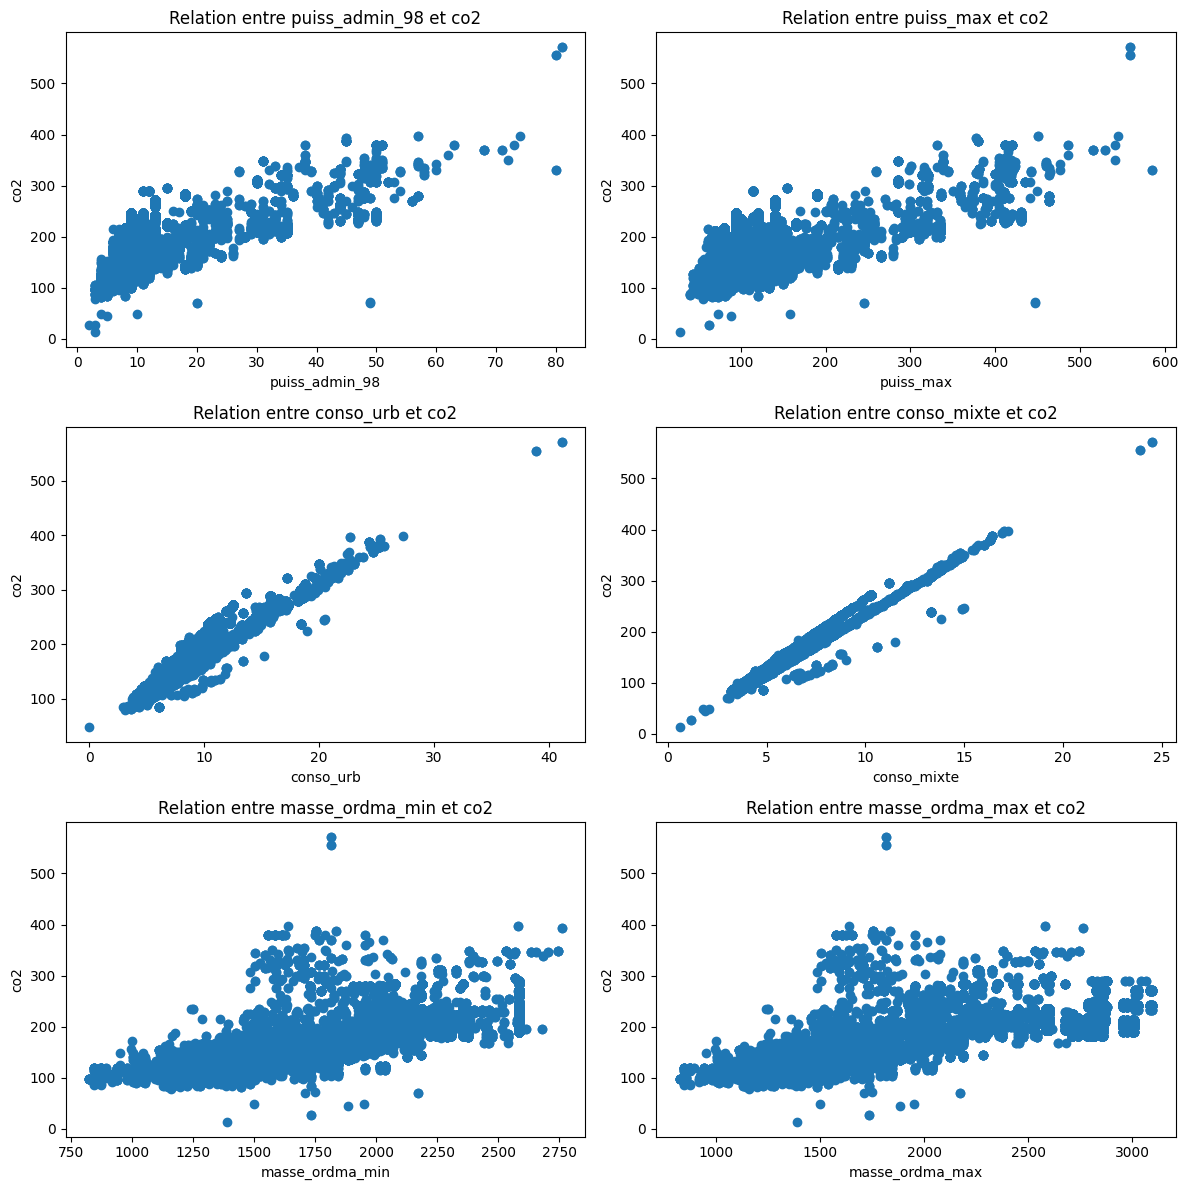

In [105]:
import matplotlib.pyplot as plt
import pandas as pd


y_var = 'co2'
x_vars = df.columns.drop(y_var)

n_rows = len(x_vars) // 2 + len(x_vars) % 2
n_cols = 2

fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4)) 
axs = axs.flatten()

for i, x_var in enumerate(x_vars):
    axs[i].scatter(df[x_var], df[y_var])
    axs[i].set_title(f'Relation entre {x_var} et {y_var}')
    axs[i].set_xlabel(x_var)
    axs[i].set_ylabel(y_var)

for ax in axs[i+1:]:
    ax.axis('off')

plt.tight_layout()  
plt.show()


COMMENTAIRE: On constate une relation linéaire forte (équivalent à une forte corrélation) entre d'une part les variables co2 et conso_mixte et d'autre part les variables co2 et conso_urb.

<span style="color:green"> Matrice de corrélation entre les variables </span>

 

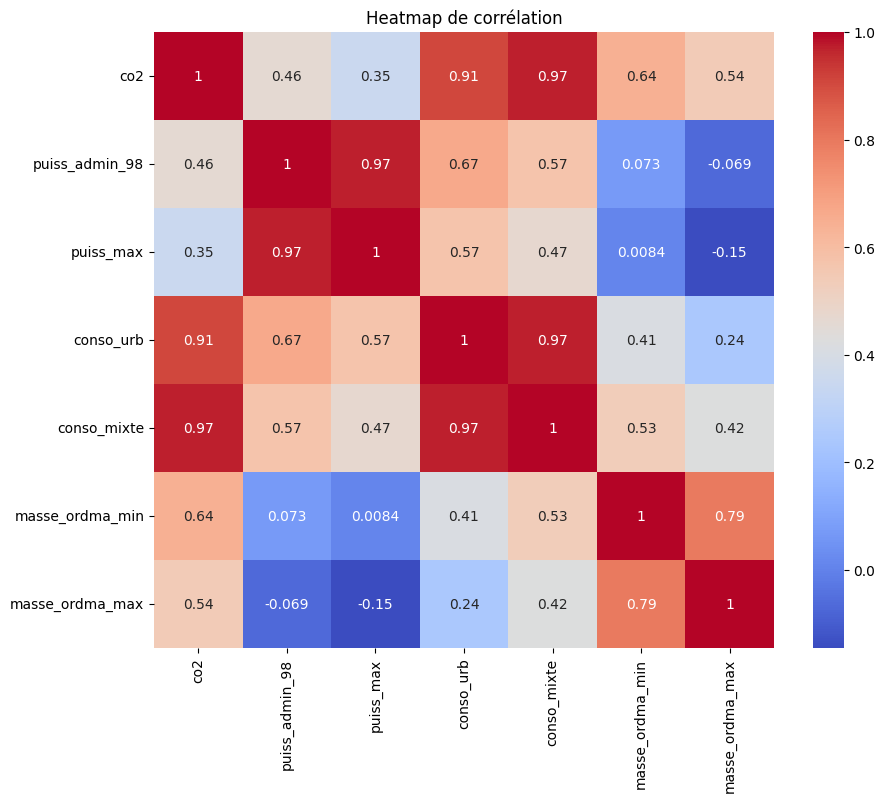

In [106]:

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()


COMMENTAIRE: D'après la matrice de corrélation, il existe une forte corrélation entre CO2 et conso_urb, entre CO2 et conso_mixte, entre puiss_admin_98 et puiss_max puis entre conso_urb et conso_mixte. Cette forte corrélation entre certaines variables explicatives peut entrainer une multicolinéarité. Il y'aura autrement dit, un problème de redondance d'information dans  notre modèle. Parmis les couples de variables explicatives corrélés, nous choisisons de supprimer la variable la moins corrélé avec le CO2. Suivant cette logique, nous supprimons les variables Conso_urb et puiss_max.

<span style="color:green"> Nouvelle matrice de corrélation </span>



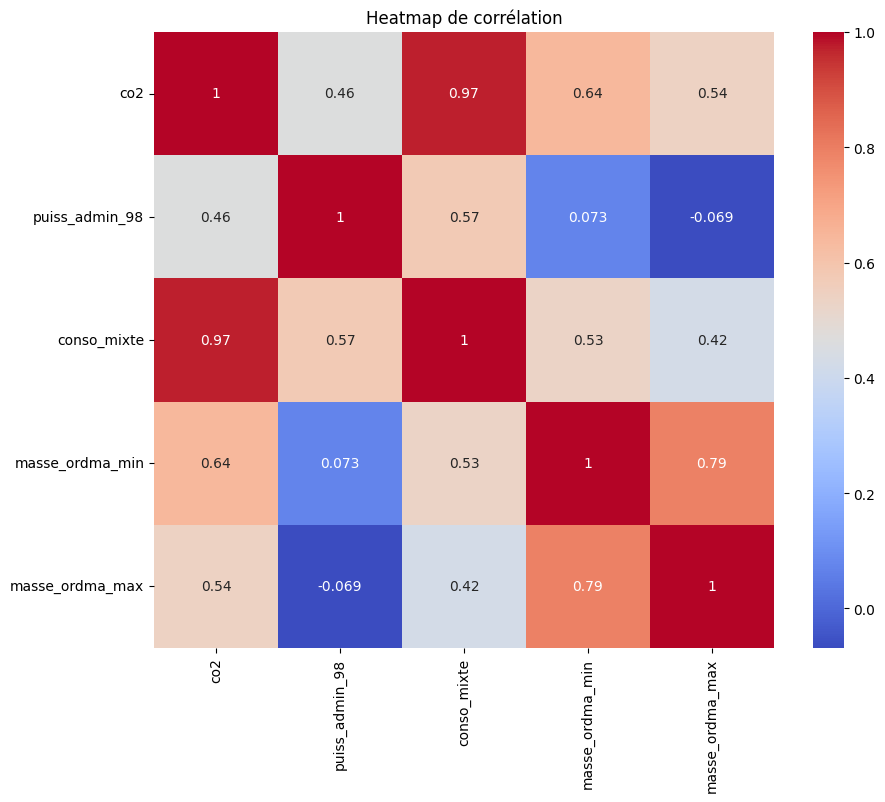

In [107]:
df=df.drop(['conso_urb','puiss_max'],axis=1)

# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# heatmap de corrélation
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
plt.title('Heatmap de corrélation')
plt.show()

# Modélisation de l'emission de CO2

<span style="color:green"> Division des données en données d'entrainement et en données de test. Nous utiliserons 80% pour l'entrainement du modèle et 20% pour le test </span>


In [108]:
# Target du modèle
Y = df['co2'].fillna(df['co2'].mean())

#  Features du modèle
X = df.drop('co2', axis=1)

train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size = 0.2, random_state = 20)

<span style="color:green"> Pipeline de Preprocessing des données: Standardisation et imputation des valeurs manquantes par la médiane </span>



In [109]:

colonnes=X.columns

data_pipeline = Pipeline([('StandardScaler', StandardScaler()), 
                            ('imputer', SimpleImputer(strategy='median')) 
                            ]) 

preprocessor= make_column_transformer((data_pipeline, colonnes))
#numeric_pipeline.fit(X) 
#new_df = numeric_pipeline.transform(test[{'Age', 'Fare'}]) 

<span style="color:green"> Modélisation par la LinearRegression </span>


In [110]:

# Pipeline du modèle de régression linéaire
model = make_pipeline(preprocessor,LinearRegression())  
# Entraînement du modèle 
model.fit(train_X, train_y)
# Prédiction sur les données de test
y_test_pred = model.predict(test_X)

# Calcule de l'erreur quadratique moyenne
rmse_lr = np.sqrt(metrics.mean_squared_error(test_y, y_test_pred))
print(" Root Mean Squared Error:", rmse_lr)
# Calcule du coefficient de détermination R2
r2_lr = r2_score(test_y, y_test_pred)
print("R2 :", r2_lr)


 Root Mean Squared Error: 5.740531470881124
R2 : 0.9708047661386702


<span style="color:green"> Visualisation de la l'ajustement de la LinearRegression à nos données </span>



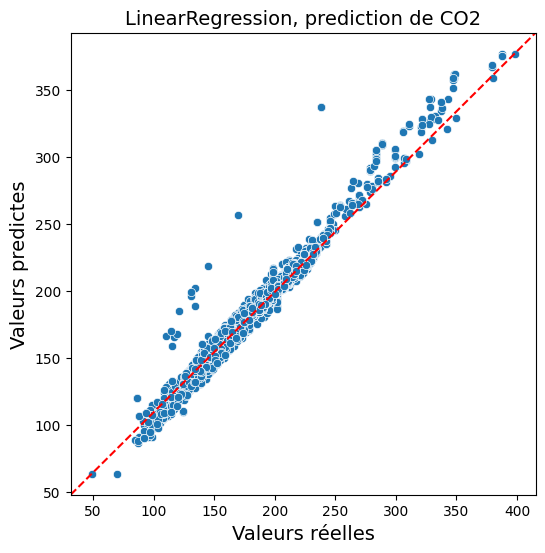

In [111]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = y_test_pred)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()

COMMENTAIRE: On constate à travers la figure que le modèle s'ajuste bien à nos données avec une variation du CO2 qui est expliquée à plus de 97% par notre modèle.

<span style="color:green"> Modélisation par un modèle Random Forest </span>



In [112]:

# Recherche des hyperparamètres optimaux
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

model_rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(train_X, train_y)
best_model_rf = grid_search_rf.best_estimator_

# Création de pipeline et entrainement avec le meilleur modèle
model_random_forest = make_pipeline(preprocessor, best_model_rf)
model_random_forest.fit(train_X, train_y) 

# Prédiction et performances du modèle
pred_y_rf = model_random_forest.predict(test_X) 
rmse_rf = np.sqrt(metrics.mean_squared_error(test_y, pred_y_rf))
print(" Root Mean Squared Error:", rmse_rf)
r2_rf = r2_score(test_y, pred_y_rf)
print("R2 :", r2_rf)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
 Root Mean Squared Error: 1.5507105085133528
R2 : 0.9978695604596087


<span style="color:green"> Visualisation de l'ajustement du RandomForestRegression à nos données </span>



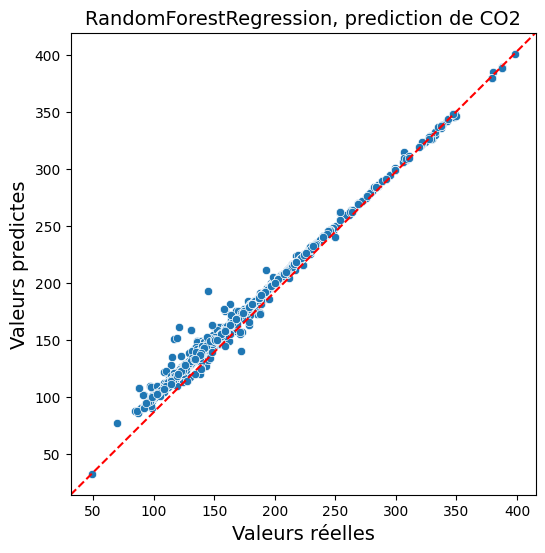

In [113]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = pred_y_rf)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("RandomForestRegression, prediction de CO2", fontsize = 14)
plt.show()

COMMENTAIRE: On constate à travers la figure que le modèle s'ajuste bien à nos données et mieux que LinearRegression avec un RMSE plus faible et un coéfficient de determination plus élevé (plus de 99%)

<span style="color:green"> Modélisation par l'algorithme XGBoost </span>



In [114]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

## Recherche des hyperparamètres optimaux
param_grid = {
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators': [10, 20, 30]
}

model_xgb = xgb.XGBRegressor(sampling_method='uniform', seed=42)
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(train_X, train_y)
best_model = grid_search.best_estimator_

# Création de pipeline et entrainement du meilleur modèle
model_xgboost = make_pipeline(preprocessor,best_model)
model_xgboost.fit(train_X, train_y) 

# Prédiction et performances du modèle
pred_y = model_xgboost.predict(test_X) 
rmse_xgb = np.sqrt(metrics.mean_squared_error(test_y, pred_y))
print(" Root Mean Squared Error:", rmse_xgb)
r2_xgb = r2_score(test_y, pred_y)
print("R2 :", r2_xgb)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
 Root Mean Squared Error: 1.4363995720047797
R2 : 0.998172075355512


<span style="color:green"> Visualisation de l'ajustement du XGBoostRegression à nos données </span>

 

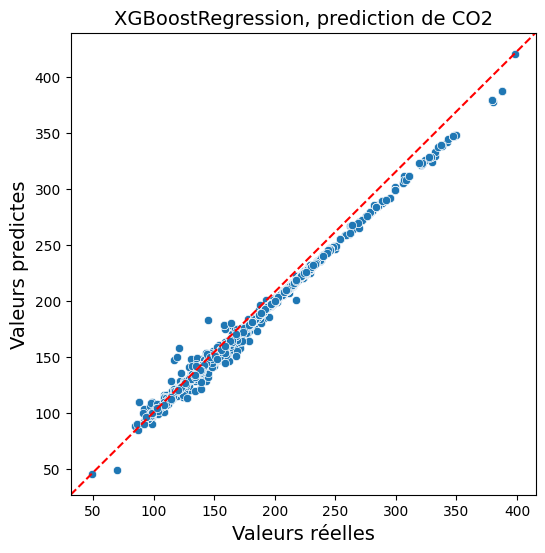

In [115]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = test_y, y = pred_y)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("XGBoostRegression, prediction de CO2", fontsize = 14)
plt.show()

COMMENTAIRE: On constate à travers la figure que le modèle s'ajuste beaucoup mieux à nos données que les deux précédents avec une variation du CO2 qui est expliquée à plus de 99% par notre modèle et un RMSE encore plus petit que les deux modèles précédents. 

 <span style="color:green">Graphique des mesures de performances des trois modèles</span> 

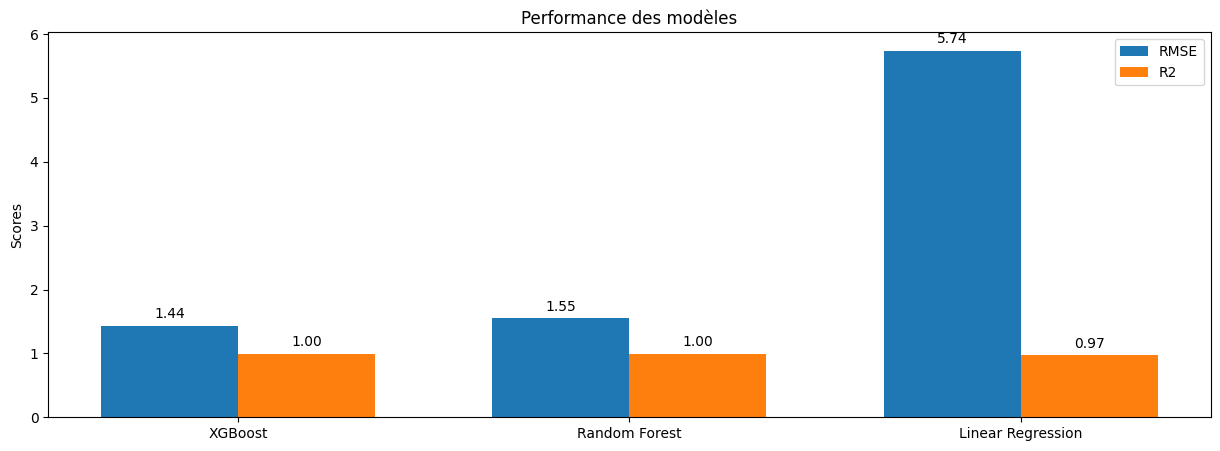

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs de RMSE et R2 pour chaque modèle
rmse_values = [rmse_xgb, rmse_rf, rmse_lr]
r2_values = [r2_xgb, r2_rf, r2_lr]

# Noms des modèles
models = ['XGBoost', 'Random Forest', 'Linear Regression']

# Position des modèles sur l'axe x
x = np.arange(len(models))

# Largeur des barres
width = 0.35  

fig, ax = plt.subplots()

# Création des barres pour le RMSE
rects1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')

# Création des barres pour le R2
rects2 = ax.bar(x + width/2, r2_values, width, label='R2')

# Ajout de titres et étiquettes
ax.set_ylabel('Scores')
ax.set_title('Performance des modèles')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Ajout des valeurs de RMSE et R2 au dessus des barres
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


Commentaire: Nous constatons au vue des performances de nos modèles que le modèle XGBoost est le meilleur parmis les deux autres(Régression Linéaire et Random Forest) car il a la plus petite erreur de prévision (RMSE) et le plus grand R2.

 <span style="color:green">Ordre d'importance des features dans la construction du modèle</span> 

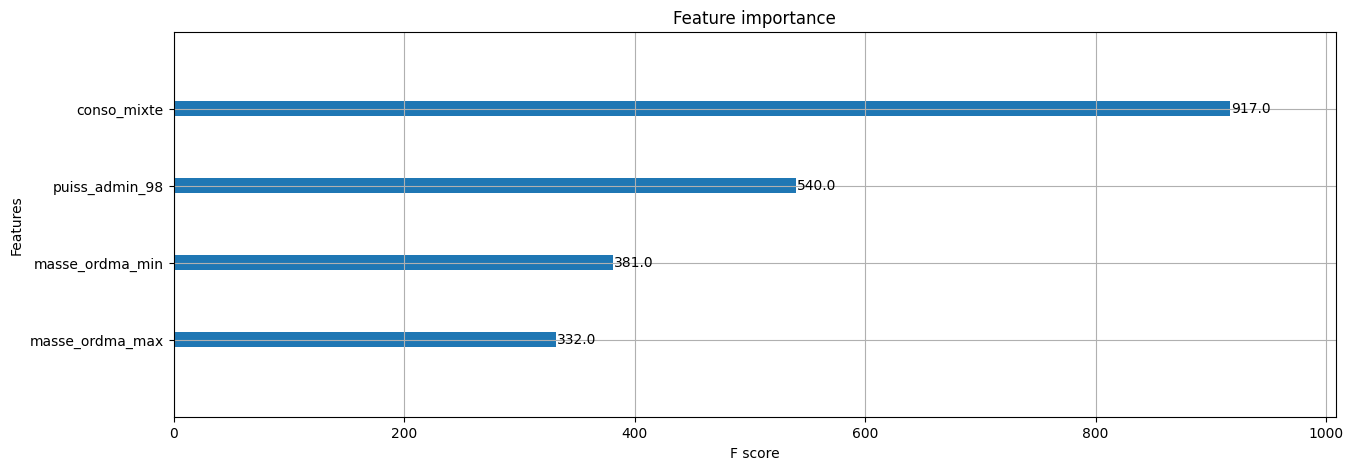

In [117]:

best_model.fit(train_X, train_y) 
xgb.plot_importance(best_model)
plt.show()

COMMENTAIRE: On constate que la variable conso_mixte qui représente la consommation extra urbaine de carburant (en l/100km) est celle qui a le plus d'influence sur la prédiction de la variable cible (target) qui est l'emission de CO2. 


<span style="color:green"> Courbe d'apprentissage de l'algorithme XGBoost </span>

In [118]:

def plot_learning_curve(estimator, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name=param_name, param_range=param_range,
                                                 scoring='neg_root_mean_squared_error', cv=None)
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Value of ' + param_name)
    plt.ylabel('Negative Root Mean Squared Error')
    plt.grid()
    
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='b')
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='r')
    
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label='Training Error')
    plt.plot(param_range, test_scores_mean, 'o-', color='r', label='Validation Error')
    
    plt.legend(loc='best')
    return plt



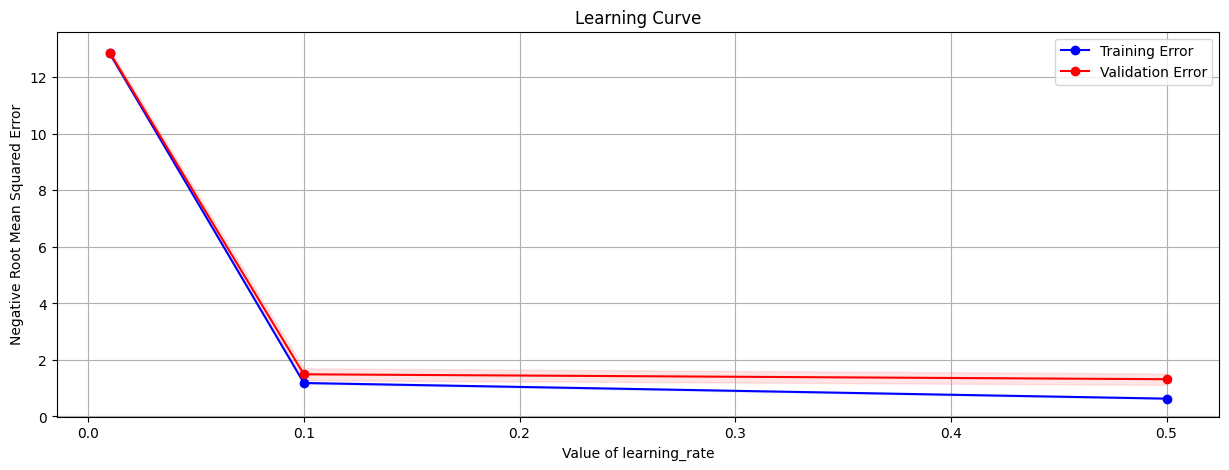

In [119]:
import xgboost
from xgboost import XGBRegressor
estimator = XGBRegressor()  
param_name= 'learning_rate'
param_range= [0.01, 0.1, 0.5]

plot_learning_curve(estimator, train_X, train_y, param_name, param_range)
plt.show()

COMMENTAIRE: Nous pouvons constater que notre modèle se généralise assez bien sur nos données de tests vu la convergence conjointe des learning curve d'apprentissage et de validation.

<span style="color:green"> Sauvégarde du meilleur modèle (XGBoost) pour déploiement </span>



In [186]:

from joblib import dump
dump(model_xgboost, 'bestModel.joblib')

['bestModel.joblib']